In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [3]:
csv_file = 'processed_data/combined_data_20250622_135700.csv'

df = pd.read_csv(csv_file)
df.head()

,timestamp,local_timestamp,lat,lon,ab_name,network,pm25_value,temperature_2m,apparent_temperature,relativehumidity_2m,windspeed_10m
0,2025-06-20T00:00:00+00:00,2025-06-20T02:00:00+02:00,50.895101,4.392718,41MEU1 - Meudon,Brussels,8.0,25.4,23.3,38.0,14.4
1,2025-06-19T23:00:00+00:00,2025-06-20T01:00:00+02:00,50.843567,4.367006,41REG1 - Brussel (Bld du Régent),Brussels,7.0,25.7,23.5,37.0,15.1
2,2025-06-19T22:00:00+00:00,2025-06-20T00:00:00+02:00,50.895101,4.392718,41MEU1 - Meudon,Brussels,8.0,25.4,23.3,38.0,14.4
3,2025-06-19T20:00:00+00:00,2025-06-19T22:00:00+02:00,50.849665,4.333820,41R001 - Molenbeek-Saint-Jean,Brussels,10.0,26.7,24.7,34.0,13.0
4,2025-06-19T19:00:00+00:00,2025-06-19T21:00:00+02:00,50.895101,4.392718,41MEU1 - Meudon,Brussels,8.0,25.4,23.3,38.0,14.4


In [4]:
print("DataFrame shape:", df.shape)
df.info()

DataFrame shape: (900, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             900 non-null    object 
 1   local_timestamp       900 non-null    object 
 2   lat                   900 non-null    float64
 3   lon                   900 non-null    float64
 4   ab_name               900 non-null    object 
 5   network               900 non-null    object 
 6   pm25_value            874 non-null    float64
 7   temperature_2m        899 non-null    float64
 8   apparent_temperature  899 non-null    float64
 9   relativehumidity_2m   899 non-null    float64
 10  windspeed_10m         899 non-null    float64
dtypes: float64(7), object(4)
memory usage: 77.5+ KB


# Data opschonen

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df['local_timestamp'] = pd.to_datetime(df['local_timestamp'])

df["ab_code"] = df["ab_name"].str.split(" - ").str[0]
df["ab_loc"] = df["ab_name"].str.split(" - ").str[1]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype                    
---  ------                --------------  -----                    
 0   timestamp             900 non-null    datetime64[ns, UTC]      
 1   local_timestamp       900 non-null    datetime64[ns, UTC+02:00]
 2   lat                   900 non-null    float64                  
 3   lon                   900 non-null    float64                  
 4   ab_name               900 non-null    object                   
 5   network               900 non-null    object                   
 6   pm25_value            874 non-null    float64                  
 7   temperature_2m        899 non-null    float64                  
 8   apparent_temperature  899 non-null    float64                  
 9   relativehumidity_2m   899 non-null    float64                  
 10  windspeed_10m         899 non-null    float64                 

In [24]:
mean_pm25 = df['pm25_value'].mean()
max_pm25 = df['pm25_value'].max()
min_pm25 = df['pm25_value'].min()

print(f"PM2.5 gemiddeld: {mean_pm25:.2f}")
print(f"PM2.5 max: {max_pm25:.2f}")
print(f"PM2.5 min: {min_pm25:.2f}")

PM2.5 gemiddeld: 5.72
PM2.5 max: 18.00
PM2.5 min: 0.00


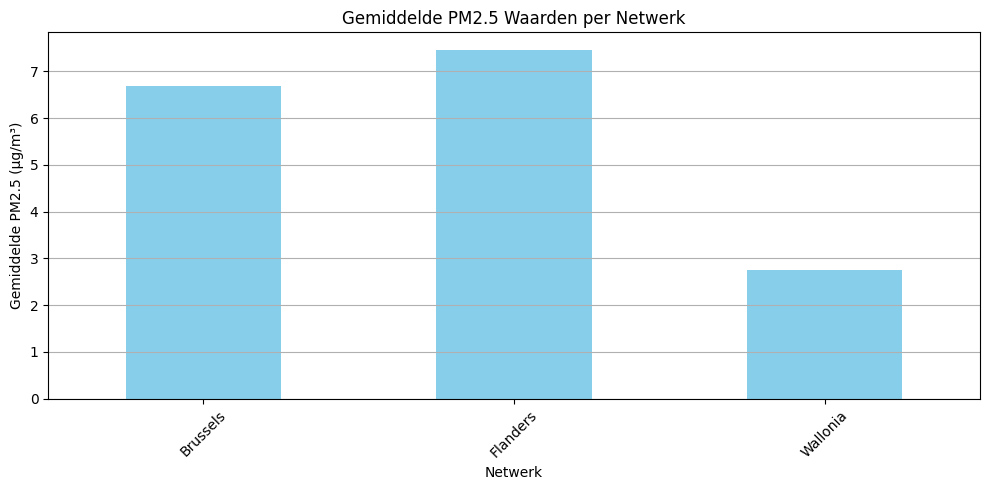

In [26]:
# Maak een plot dat de PM2.5 waarden toont over de verschillende netwerken
plt.figure(figsize=(10,5))
df.groupby('network')['pm25_value'].mean().plot(kind='bar', color='skyblue')
plt.title('Gemiddelde PM2.5 Waarden per Netwerk')
plt.xlabel('Netwerk')
plt.ylabel('Gemiddelde PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

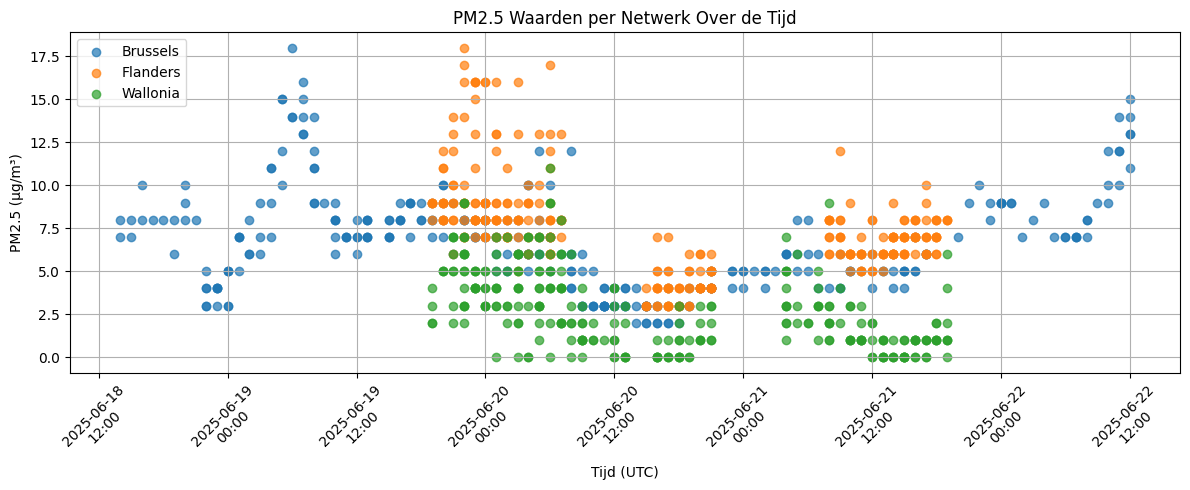

In [27]:
# Maak een plot van de PM2.5 waarden per timestamp per netwerk
import matplotlib.dates as mdates
plt.figure(figsize=(12,5))
for name, group in df.groupby('network'):
    plt.scatter(group['timestamp'], group['pm25_value'], label=name, alpha=0.7)
plt.title('PM2.5 Waarden per Netwerk Over de Tijd')
plt.xlabel('Tijd (UTC)')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

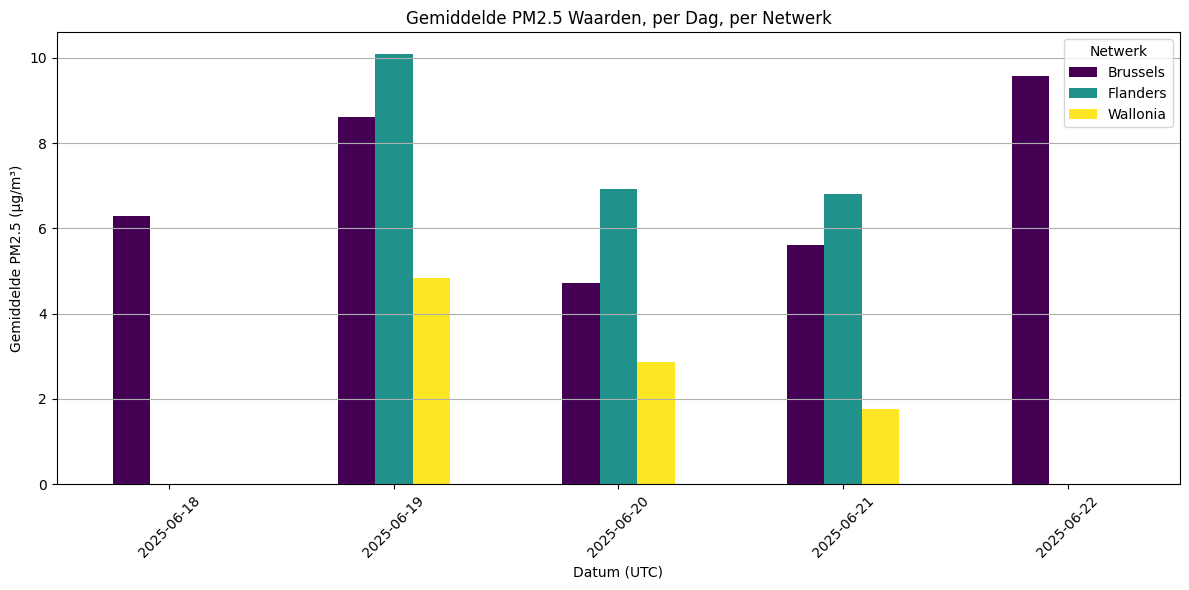

In [49]:
# Maak een grafiek van de gemiddelde PM2.5 waarde per dag, gegroepeerd per netwerk
df['date'] = df['timestamp'].dt.date

daily_mean = df.groupby(['date', 'network'])['pm25_value'].mean().unstack()
daily_mean.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Gemiddelde PM2.5 Waarden, per Dag, per Netwerk')
plt.xlabel('Datum (UTC)')
plt.ylabel('Gemiddelde PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.legend(title='Netwerk')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

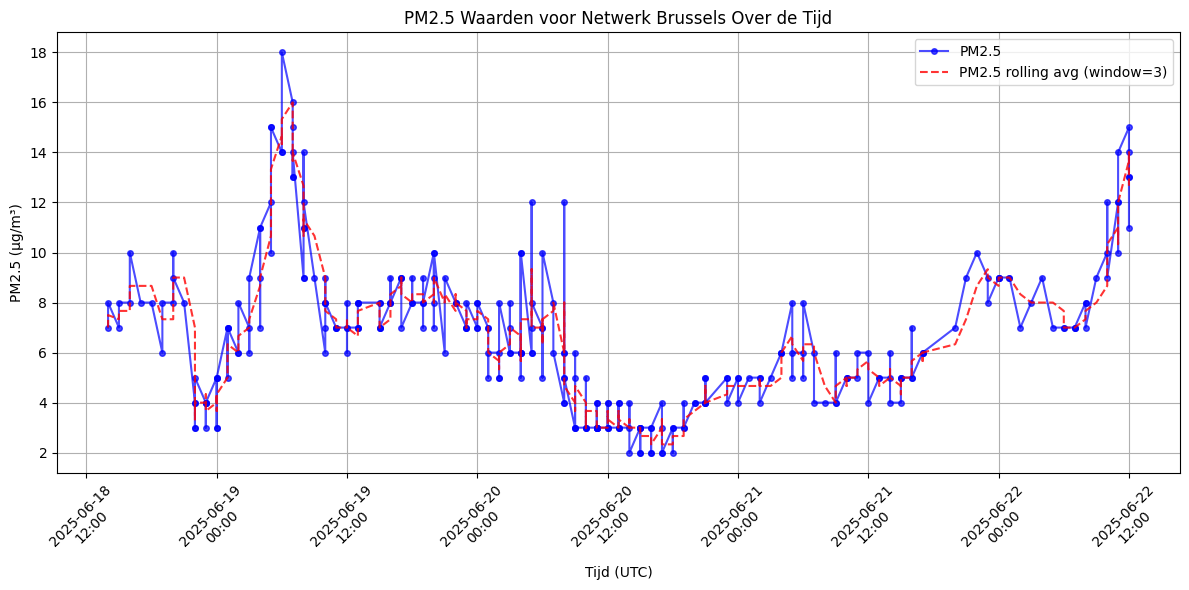

In [59]:
# Filter op Brussels
timeseries_bruss_df = df[df['network'] == 'Brussels'][['timestamp', 'pm25_value']].copy()

# Sorteer op timestamp om zeker te zijn dat de lijn correct loopt
timeseries_bruss_df = timeseries_bruss_df.sort_values('timestamp')

# Eventueel een rolling average toevoegen (bijvoorbeeld met een venster van 3 punten)
timeseries_bruss_df['pm25_rolling'] = timeseries_bruss_df['pm25_value'].rolling(window=3, min_periods=1).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(
    timeseries_bruss_df['timestamp'], 
    timeseries_bruss_df['pm25_value'], 
    marker='o', 
    markersize=4, 
    linestyle='-', 
    color='blue', 
    alpha=0.7, 
    label='PM2.5'
)
plt.plot(
    timeseries_bruss_df['timestamp'], 
    timeseries_bruss_df['pm25_rolling'], 
    linestyle='--', 
    color='red', 
    alpha=0.8, 
    label='PM2.5 rolling avg (window=3)'
)


plt.title('PM2.5 Waarden voor Netwerk Brussels Over de Tijd')
plt.xlabel('Tijd (UTC)')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid(True)

# Slimme x-as
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))

plt.legend()
plt.tight_layout()
plt.show()



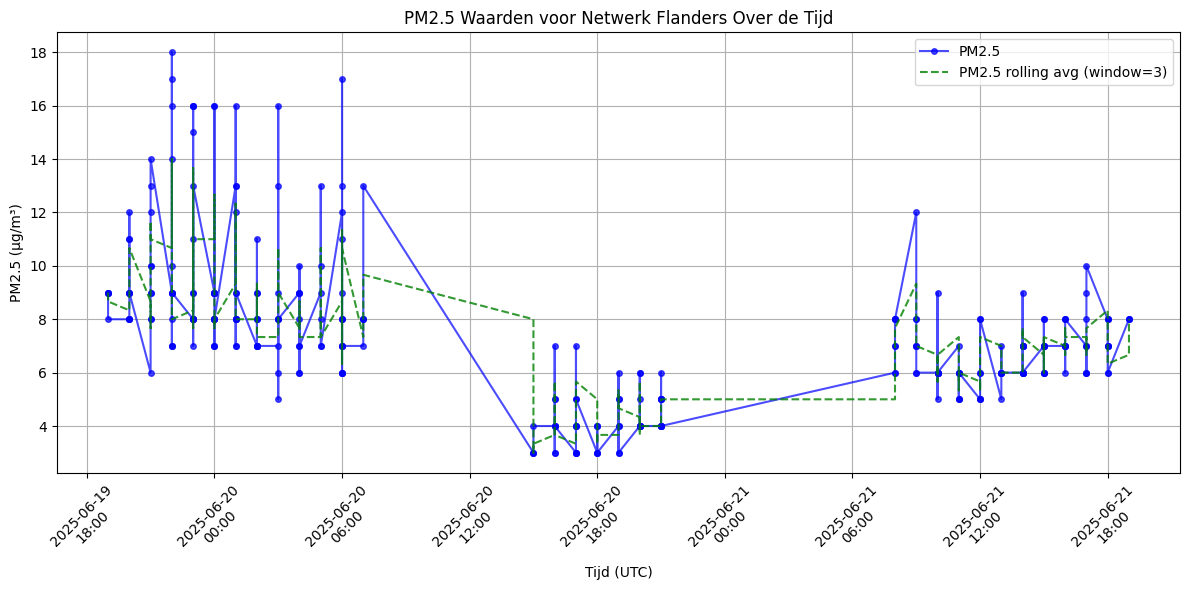

In [60]:
# Filter op Flanders
timeseries_flan_df = df[df['network'] == 'Flanders'][['timestamp', 'pm25_value']].copy()

# Sorteer op timestamp om zeker te zijn dat de lijn correct loopt
timeseries_flan_df = timeseries_flan_df.sort_values('timestamp')

# Eventueel een rolling average toevoegen (bijvoorbeeld met een venster van 3 punten)
timeseries_flan_df['pm25_rolling'] = timeseries_flan_df['pm25_value'].rolling(window=3, min_periods=1).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(
    timeseries_flan_df['timestamp'], 
    timeseries_flan_df['pm25_value'], 
    marker='o', 
    markersize=4, 
    linestyle='-', 
    color='blue', 
    alpha=0.7, 
    label='PM2.5'
)
plt.plot(
    timeseries_flan_df['timestamp'], 
    timeseries_flan_df['pm25_rolling'], 
    linestyle='--', 
    color='green', 
    alpha=0.8, 
    label='PM2.5 rolling avg (window=3)'
)

plt.title('PM2.5 Waarden voor Netwerk Flanders Over de Tijd')
plt.xlabel('Tijd (UTC)')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid(True)

# Slimme x-as
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))

plt.legend()
plt.tight_layout()
plt.show()

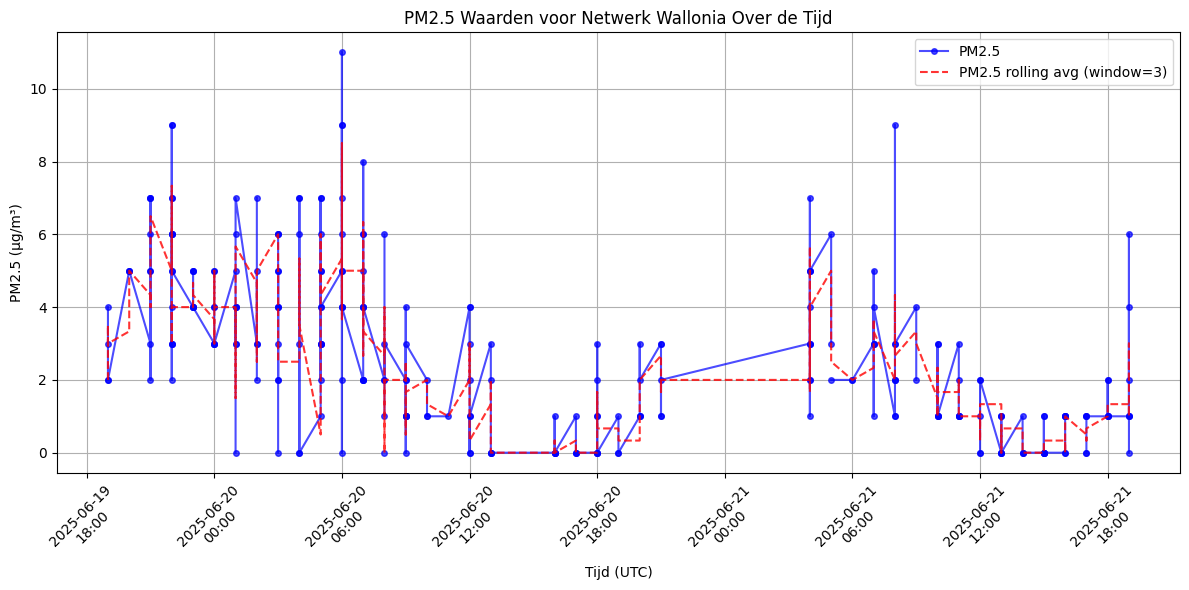

In [61]:
# Filter op Wallonia
timeseries_wall_df = df[df['network'] == 'Wallonia'][['timestamp', 'pm25_value']].copy()

# Sorteer op timestamp om zeker te zijn dat de lijn correct loopt
timeseries_wall_df = timeseries_wall_df.sort_values('timestamp')

# Eventueel een rolling average toevoegen (bijvoorbeeld met een venster van 3 punten)
timeseries_wall_df['pm25_rolling'] = timeseries_wall_df['pm25_value'].rolling(window=3, min_periods=1).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(
    timeseries_wall_df['timestamp'], 
    timeseries_wall_df['pm25_value'], 
    marker='o', 
    markersize=4, 
    linestyle='-', 
    color='blue', 
    alpha=0.7, 
    label='PM2.5'
)
plt.plot(
    timeseries_wall_df['timestamp'], 
    timeseries_wall_df['pm25_rolling'], 
    linestyle='--', 
    color='red', 
    alpha=0.8, 
    label='PM2.5 rolling avg (window=3)'
)

plt.title('PM2.5 Waarden voor Netwerk Wallonia Over de Tijd')
plt.xlabel('Tijd (UTC)')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid(True)

# Slimme x-as
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))

plt.legend()
plt.tight_layout()
plt.show()